# Rotor Boom Length Analysis
This notebook is intended to investigate the expected length of the rotor boom given a certain propeller size and center hub dimensions.

Rotor Boom Properties:

|        Name        |      Properties     |     Description     |
|:------------------:|:-------------------:|:-------------------:|
|  Yield Strength    |      1783 MPa       |     Maximum Stress before Yield    |
|  Youngs Modulus    |       300 GPa       |     Property of the Stiffness      |

Some papers talk about an optimal distance between adjacent motors for improved aerodynamic efficieny.

Within the paper, the length of the arm and distance between adjacent motors is multiplied by a ratio relating to the diameter of the propeller, $D_{propeller}$, installed on the motor. The study explored ratios, $ \sigma = [1.0, 1.2, 1.4, 1.6, 1.8]$, and the effective aerodynamic improvement based on these ratios [1].

$$Arm Length = \sigma \times D_{propeller}$$

Lei [1] however, did not draw any conclusion on a specific function that relates the ratio, $\sigma$, to the aerodynamic performance but within their circumstances a higher ratio did improve the aerodynamic performance of their sUAS(small Unmanned Aircraft System). Thus there is no guarentee that the optimal ratio within Lei's [1] study will be the optimal solution within this study.

Similar performance was seen in study [2] which was specifically performed in relation to a hexacopter with 15.7" propellers. The results from [2] were not exactly the same as in [1] however the two shared similarities, specifically that higher $\sigma$ ratios improved performance. [2] showed that $\sigma=1.6$ was the optimal ratio with $\sigma=1.8$ trailing closer behind. However, an important take away from [2] was the practical benefit of having a slightly shorter rotor boom for its weight reduction, reduced moment of inertia and general ease of portability.

The main take away from [1, 2], is that the rotor boom length should be larger than the diameter of the propeller. [1, 2] both show that a $\sigma$ ratio $\ge1.2$ provides improved thrust performance and power consumption.

#### Brief Explanation on Higher $\sigma$ ratios

[1, 2] explain that the closer the rotors are spaced to each other the higher the interaction of their wakes. The wake could be explained as the air being push through the rotors and expelled on the opposite side. If there is too great an interation between the two rotor wakes it can lead to the effort of the motors being less effective. This results in the motors having to do additional work to equal the performance as in a case where there is less interaction between the motor wakes. Simply put, too much interaction between the motor wakes makes then less efficient and require more power output to perform the same amount of work.

[1, 2] both observed that lower $\sigma$ ratios produced lower pressure differences between the upper and lower surface of the propellers. Effectively accross the configurations, the pressure on the lower surfaces were distinctly similar. However, in the lower ratios, the upper pressure was higher resulting in a lower difference between the two surfaces and thus resulting in a lower produced thrust.

Thrust incase of a multirotor acts would be similar to lift, so if there is lower thrust there will be lower lift and the motors are required to work harder to produce the required lift.
### Minimum Rotor Boom Length
The minimum rotor boom length is equal to the propeller diameter. This distance is measured from a point, $O$, with an axis running through it. Point, $O$, acts as the relative origin and is the axis about which the rotor booms are evenly spaced by $60^{\circ}$, in the case of a hexacopter.

This can be shown through the following image proof which is based on an isosceles triangle. For the case of a hexacopter where the rotor boom lengths are equal and the rotor booms are spaced $60^{\circ}$ apart, an equilateral triangle is formed and thus all sides are the same length.

<img src="rboomLengthExplanation.png" alt="drawing" width="600"/>

Thus the distance between the motor centers is equal to the distance between the motor center and the origin of the frame, point $O$.

$$d_{arm2motor} = d_{motor2motor}$$

In [1]:
# Typical Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Visual Aid For the problem definition and Layout

#### Figure 1:
Hexacopter Layout Description:

|        Name        |      Description     |     Value    |
|:------------------|:-------------------:|:-------------------:|
| Wingspan    |     Distance between opposite motor centers       |     900mm   |
| Boom Length    |     CF Boom Length      |     373mm   |
| Boom Hole to Hole Length    |     CF Boom Length      |     345mm   |
| Propeller Size    |     Diameter of propeller      |     431.8mm   |
| Adjacent Distance    |     Distance between adjacent motor centers       |     470mm   |
| Angle    |     Angle between rotor booms       |     60$^{\circ}$   |

<img src="OblongSizeEstimation.png" alt="drawing" width="650"/>

### CF Boom Performance Data

In [28]:
boom_data = pd.read_csv('CSVFiles/clean_CFSquareBoom20Kg2Bolts.csv')
# Space required to mount the motor and boom to the chassis, i.e. where the mounting holes are.
mounting_space = 28 
boom_data["HoleToHoleLength"] = boom_data['TubeLength'] - mounting_space
boom_data.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,HoleToHoleLength
0,350.0,10.0,3.22471,23.06575,178.78,322.0
1,360.0,10.0,3.53468,23.73175,188.51,332.0
2,370.0,10.0,3.86371,24.39775,194.30,342.0
3,380.0,10.0,4.21243,25.06375,195.67,352.0
4,390.0,10.0,4.58163,25.72975,201.35,362.0


### Propeller Definition

In [24]:
diam = 17 # Propeller Diameter in inches(in)
prop_diam_mm = np.round(diam * 25.4) # Propeller Diameter in millimeters(mm)

print("The following are Rounded Up Values:")
print("Propeller Diameter:",np.round(prop_diam_mm,1),"mm")

# The min dist is the same as the propeller diameter realistically this should be higher.
prop_dist_required = round(prop_diam_mm*1.05 + 1) # +1 for a round number 
print("Min Dist Between Motors:", np.round(prop_dist_required),"mm")
space_between_rotors = prop_dist_required - prop_diam_mm
print("Space Between Rotors:", np.round(space_between_rotors,1),"mm")

The following are Rounded Up Values:
Propeller Diameter: 432.0 mm
Min Dist Between Motors: 455 mm
Space Between Rotors: 23.0 mm


### Boom Length Requirements and Constants

In [25]:
sigma = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0] # sigma as described above
chassis_hole_dist = [105, 125, 150, 175, 200]

### Boom Lengths for $\sigma$ ratios 1.0 - 2.0

In [29]:
min_boom_length = prop_dist_required - chassis_hole_dist[0] + mounting_space
print("Min Boom Length:", min_boom_length,"mm")
sigma_boom_lengths = min_boom_length*np.array(sigma)
print("Sigma Ratios:",sigma_boom_lengths)

Min Boom Length: 378 mm
Sigma Ratios: [378.  453.6 529.2 604.8 680.4 756. ]


### Boom Length Analysis
The following set of code will evaluate the SOLIDWORKS data and apply the following method:
1. Given a chassis hole distance, does the `boom_data["HoleToHoleLength"]` meet the `min_boom_length`? <br>i.e. `boom_data["HoleToHoleLength"]`$\ge$ `min_boom_length`.


2. 
    True: Show the difference greater than<br>
    False: Show the still distance required<br>


3. Calculate the relative ratio of `boom_data["HoleToHoleLength"]` to `min_boom_length`

#### Shortage or Excess of Length compared to `min_boom_length`

In [30]:
boom_data["HoleDiff"] = (boom_data['HoleToHoleLength'] + chassis_hole_dist[0]) - prop_dist_required
boom_data.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,HoleToHoleLength,HoleDiff
0,350.0,10.0,3.22471,23.06575,178.78,322.0,-28.0
1,360.0,10.0,3.53468,23.73175,188.51,332.0,-18.0
2,370.0,10.0,3.86371,24.39775,194.30,342.0,-8.0
3,380.0,10.0,4.21243,25.06375,195.67,352.0,2.0
4,390.0,10.0,4.58163,25.72975,201.35,362.0,12.0


#### What is the Ratio of Boom Length to `min_boom_length`

In [31]:
def ratio_func(temp_data):
    #print(temp_data)
    if temp_data['HoleDiff'] > 0:
        return np.round((temp_data['HoleToHoleLength']+chassis_hole_dist[0])/prop_dist_required,2)
    else:
        return 1.00
    
boom_data['AeroRatio'] = boom_data.apply(ratio_func,axis=1)
boom_data.head()

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,HoleToHoleLength,HoleDiff,AeroRatio
0,350.0,10.0,3.22471,23.06575,178.78,322.0,-28.0,1.00
1,360.0,10.0,3.53468,23.73175,188.51,332.0,-18.0,1.00
2,370.0,10.0,3.86371,24.39775,194.30,342.0,-8.0,1.00
3,380.0,10.0,4.21243,25.06375,195.67,352.0,2.0,1.00
4,390.0,10.0,4.58163,25.72975,201.35,362.0,12.0,1.03


In [35]:
min_space = prop_diam_mm*0.3
boom_data[boom_data['HoleDiff']>=min_space]

,TubeLength,TubeOD,Displacement1,Mass1,Stress1,HoleToHoleLength,HoleDiff,AeroRatio
16,510.0,10.0,10.81410,33.72175,277.180,482.0,132.0,1.29
17,520.0,10.0,11.50078,34.38775,274.910,492.0,142.0,1.31
18,530.0,10.0,12.21664,35.05375,287.680,502.0,152.0,1.33
19,540.0,10.0,12.96083,35.71975,286.300,512.0,162.0,1.36
20,550.0,10.0,13.73529,36.38575,292.300,522.0,172.0,1.38
...,...,...,...,...,...,...,...,...
175,660.0,30.0,0.79251,141.39200,69.451,632.0,282.0,1.62
176,670.0,30.0,0.82945,143.53800,70.652,642.0,292.0,1.64
177,680.0,30.0,0.86737,145.68400,71.587,652.0,302.0,1.66
178,690.0,30.0,0.90689,147.83000,72.524,662.0,312.0,1.69


## Figures and Plotted Results

In [2]:
dfSquare = pd.read_csv("CSVFiles/clean_CFSquareBoom20Kg2Bolts.csv")
dfRound = pd.read_csv("CSVFiles/clean_CFRoundBoom20Kg2Bolts.csv")

dfConcat = pd.concat([dfSquare.assign(dataset='Square'), dfRound.assign(dataset='Round')])

In [3]:
dfConcat = dfConcat[(dfConcat['TubeLength']>=370)&(dfConcat['TubeOD']>10)]

### Stress Curve
Need to do:
1. Find suitable reason for the curve spikes and jumps
2. Verify the curve shapes, do they make sense. Compare to stress vs strain curves.

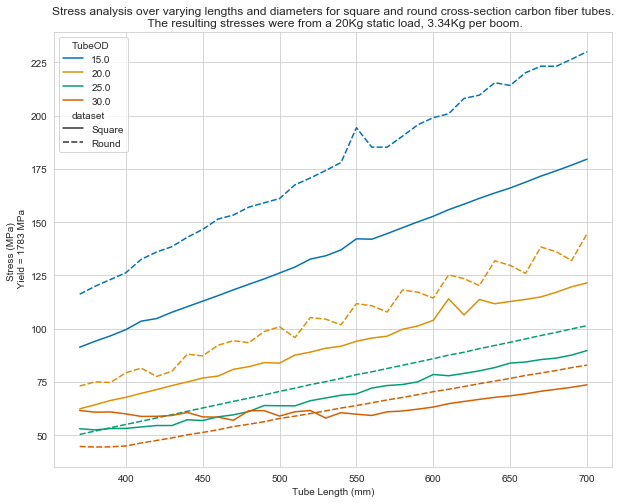

In [10]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dfConcat['TubeLength'],y=dfConcat['Stress1'],data=dfConcat,hue=dfConcat['TubeOD'], style=dfConcat['dataset'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Stress (MPa) \n Yield = 1783 MPa")
#plt.yticks([50,75,100,125,150,175,200,225])
plt.title("Stress analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.\n The resulting stresses were from a 20Kg static load, 3.34Kg per boom.")
plt.show()

In [11]:
fig.savefig("SqRndStressCurve20Kg.png")

### Displacement Curve
The carbon fiber tubes were fixed in the same way and subject to the same applied load at the opposite end of the rotor boom. The test simulated a 20Kg static load with equats to 3.34Kg per rotor boom, the test is a simulation of hovering supporting an all up weight of 20Kg.

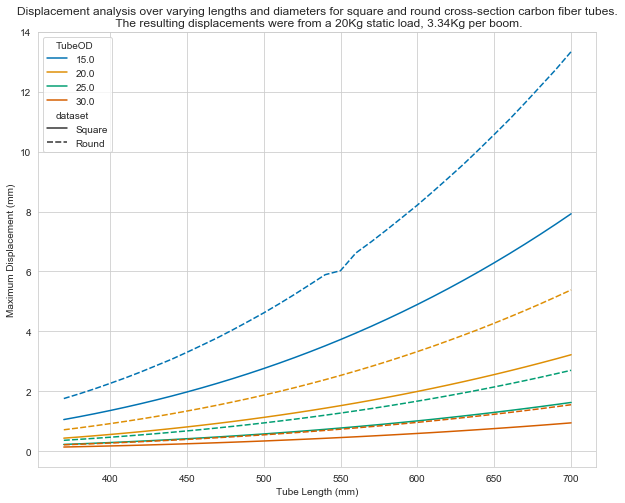

In [12]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dfConcat['TubeLength'],y=dfConcat['Displacement1'],data=dfConcat,hue=dfConcat['TubeOD'], style=dfConcat['dataset'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Maximum Displacement (mm)")
#plt.yticks([50,75,100,125,150,175,200,225])
plt.title("Displacement analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.\n The resulting displacements were from a 20Kg static load, 3.34Kg per boom.")
plt.show()

In [13]:
fig.savefig("SqRndDispCurve20Kg.png")

### Mass Curve

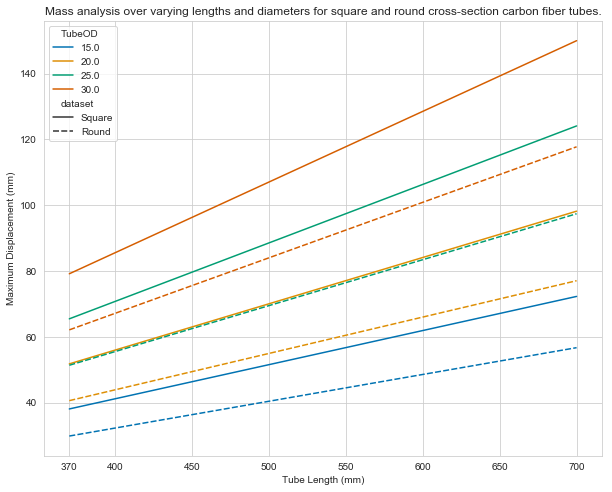

In [12]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=dfConcat['TubeLength'],y=dfConcat['Mass1'],data=dfConcat,hue=dfConcat['TubeOD'], style=dfConcat['dataset'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Maximum Displacement (mm)")
plt.xticks([370,400,450,500,550,600,650,700])
plt.title("Mass analysis over varying lengths and diameters for square and round cross-section carbon fiber tubes.")
plt.show()

### Analysis on Rotor Boom Length

The expected response from increasing the rotor boom lengths as the following effects:
1. Agility vs Stability:
- Longer rotor booms provide more stability and make the sUAS less agile. This occurs as the moment of inertia increases with longer rotor booms and thus requires more energy to change the momentum. In other words, a motor on a longer rotor boom must output a higher power to bring about the same change as a motor on a shorter rotor boom.
2. Weight:
- The mass of the rotor boom increase linearly as the length increases.
- Square tubing is heavier than round however this is relfected in imporved performance in the stress induced and displacement.
3. Aerodynamic Performance
- <span style="color:red"> So the rotors do create some kind of rotor wash and turbulent air around them, I am just trying to find some explanation for it. Some hobbyst claim that a rule of thumb is the rotors should be a gap of 1/3 diameter between. In terminology, this is effectively a sigma ratio of 1.3</span>.

- [1, 2] Provide evidence that suggest having the rotors spaced further apart can improve the aerodynamic performance during hover. Both papers [1, 2] show that increasing the distance between the motors to have a dimensionless ratio greater than, $\sigma=\frac{L_{arm}}{D_{prop}}=1$, is beneficial. Ratios of $1.2\to 1.8$ show characteristics of improved thrust and power consumption. In [1], it was found that $\sigma = 1.8$ had the best efficiency however, [2] show that $\sigma=1.6$ was optimal. A point of interest made in [2] was that a **compromise** between **hover efficieny** and **rotor boom length** should be reached as longer rotor booms bring about an increase in weight and inertia of the multirotor.

## Choosing a Rotor Boom Length for the Science Drone

In [ ]:
... next bit of work

## References:
    [1] MDPI and ACS Style Lei, Y.; Huang, Y.; Wang, H. Aerodynamic Performance of an Octorotor SUAV with Different Rotor Spacing in Hover. Processes 2020, 8, 1364. [https://doi.org/10.3390/pr8111364]
   [Link [1]](https://doi.org/10.3390/pr8111364)
   
    [2] Y. Lei and M. Cheng, “Aerodynamic performance of a hex-rotor unmanned aerial vehicle with different rotor spacing,” Measurement and Control, vol. 53, no. 3-4, pp. 711–718, 2020. [https://doi.org/10.1177/0020294019901313]
   [Link [2]](https://doi.org/10.1177/0020294019901313)
    
    